<h1> What's cooking?!</h1>


## The problem statement-



<p>The datasets consists of a number of recipes along with it's respective ingredients. Each recipe belongs to a particular cuisine. The goal of this project is to use the ingredients of each recipe and predict the cuisine it belongs to.
<br>
Sounds fun?
<br>
Let's get started! :D</p>

This is a classification problem, i.e., we will be classifyng a recipe into it's cuisine, based on the ingredients involved in the recipe.

A number of algorithms have been used previously to solve this problem, each having a different accuracy level. 
SVM algorithm, Artificial Neural Networks, K-Nearest Neigbours are a few algorithms that have been already used for this problem.
We will be concentrating on Artificial Neural Networks to solve this.
But more on that later!

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as  np
import random
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
import gc

I got this dataset from Kaggle and found it rather interesting. It includes food :P

Let's start exploring the dataset-
We shall load it and see what is available in our dataset.




# Exploring the data-

In [21]:
train_df=pd.read_json('food_train.json')
train_df.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


As shown above, the dataset has three columns-
    1. cuisine - Consists of the cuisine the recipe belongs to
    2. id - The unique ID of each recipe
    3. ingredients - It is a list consisting of all the ingredients constituting the respective recipe.



In [22]:
set(train_df['cuisine'])

{'brazilian',
 'british',
 'cajun_creole',
 'chinese',
 'filipino',
 'french',
 'greek',
 'indian',
 'irish',
 'italian',
 'jamaican',
 'japanese',
 'korean',
 'mexican',
 'moroccan',
 'russian',
 'southern_us',
 'spanish',
 'thai',
 'vietnamese'}

We use the "set( )" function to find out the total number of distinct cuisines present in the given dataset.
We have 20 ingredients here.


In [23]:
new_test_df=pd.DataFrame()
new_train_df=pd.DataFrame()


In [24]:
new_train_df = train_df

# Data Preprocessing-

As we can see, the ingredients are present in lists in the dataset.
In order to be able to work on this data, we will be converting this list of ingredients into attributes themselves. We shall perform binary encoding on this list so as to get attributes such that if an ingredient is present in a recipe, it will be represented as 1 and 0 if it isn't.

In order to do so, we get all the ingredients in all the recipes into a single list(new_ingredients). 
For each ingredient in this list, we check if that ingredient is present in each recipe. If it is, we assign 1 under that attribute (the ingredient) and 0 otherwise.

In [25]:
# Get the ingredients column from the new train data and create the list of all existing ingredients
new_ingredients = new_train_df.ingredients
rawlist=[item for sublist in new_ingredients.ravel() for item in sublist] #convert the ingredients list of lists into a list
ingredients = list(set(rawlist))
for ing in ingredients:
    vector=[]
    for recipe in new_train_df.ingredients: 
        if ing in recipe:
            vector.append(1)
        else:
            vector.append(0)
    new_train_df[ing]=pd.Series(vector,index=new_train_df.index) # Adds column containing 0 and 1's for this ingredient
    
    



We now remove the column the originally consisted of the ingredients in the form of a list.
We also remove the column that contains the ID.

This is called data preprocessing. 
We keep only what is required to solve the problem and omit the rest of the details.

In [26]:
new_train_df=new_train_df.drop('ingredients',1)
new_train_df=new_train_df.drop('id',1)

This is what the new datafram consists of now-
    1. The cuisine
    2. The ingredients, binary encoded

In [27]:
new_train_df.head()

,cuisine,canned chicken breast,mixed dried fruit,parsley,tubetti,pepper,wild garlic,free-range chickens,whipping cream,ground pecans,...,pork cubes,peaches,chow mein noodles,low fat coleslaw dressing,crumbled blue cheese,pie crust,whole grain English muffins,Old El Paso Flour Tortillas,corn niblets,tamarind water
0,greek,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,southern_us,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,filipino,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Next, we shall split the dataset into train and test data.
We will be using the training data to train our model. The model learns what ingredients would belong to what cuisines.
The test data will be used to check the model, if it predicts the right cuisine.

In [28]:
new_train1,new_test1 = train_test_split(new_train_df,test_size=0.25)

In [29]:
#y has the target values for training data

x = new_train1.iloc[:,1:]
y = new_train1['cuisine']


s = pd.Series(y.values, dtype="category")
y = s.cat.codes

In [30]:
#ytr has the target values for training data


xtr = new_test1.iloc[:,1:]
ytr = new_test1['cuisine']


st = pd.Series(ytr.values, dtype="category")
ytr = st.cat.codes


# Picking a Model-

To train our dataset we shall use Neural Networks in TensorFlow.

<h3>Now, what are Neural Networks?</h3>
<br>
A neural network is a series of algorithms that endeavors to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates.

A neural network works similarly to the human brain’s neural network. A “neuron” in a neural network is a mathematical function that collects and classifies information according to a specific architecture. 

A neural network contains layers of interconnected nodes. Each node is a perceptron and is similar to a multiple linear regression. The connections between nodes of adjacent layers have “weights” associated with them. The goal of learning is to assign correct weights for these edges. Given an input vector, these weights determine what the output vector is.


Read more: Neural Network https://www.investopedia.com/terms/n/neuralnetwork.asp#ixzz5UpbpvcDs 


We will be using Keras, which is a Neural network API used in TensorFlow

The following code creates a Sequestial model by passing a list of layer instances to the constructor. The Sequential model is a linear stack of layers.

Under the "activation" parameter, we specify the activation function.
Here, we use the tanh function. We use the softmax function in the output layer.
These two functions were narrowed down after experimenting with various other function such as the relu and sigmoid functions.

We also specify the number of nodes for the input layer and the hidden layers here, just before the activation parameter. 

The number of hidden layers and the number of nodes it will contain waere both decided after having performed the training with other numbers. This seemed to yield the best result.


In [31]:
model = keras.Sequential([
    keras.layers.Dense(653,activation=tf.nn.tanh, input_shape=(x.values[0].shape)),
    keras.layers.Dense(20,activation=tf.nn.softmax)
])

We use the Adam optimizer here.
Adam stands for Adaptive Moment Estimation. It is a method that computes adaptive learning rates for each parameter.

Adam works well in practice and compares favorably to other adaptive learning-method algorithms as it converges very fast and it rectifies every problem that is faced in other optimization techniques such as vanishing learning rate, slow convergence or high variance in the parameter updates which leads to fluctuating loss function.

-Cross entropy is a loss function, used to measure the dissimilarity between the distribution of observed class labels and the predicted probabilities of class membership

In [32]:
model.compile(optimizer=keras.optimizers.Adam(0.00001),loss="sparse_categorical_crossentropy",metrics=['accuracy'])

We now train our model with suitable number of epochs so as to get the most accuracy level.
The algorithm backpropogates and makes changes to the weign=hts in the neural networks based on the previous output.
It backpropogates until the most accurate result is got.
To avoid any sort of overfitting of the model, I chose to perform 2-5 epochs at a time to ensure that th emodel is noot overly trained.


In [33]:
history = model.fit(x,y,epochs=2,validation_split=0.2,verbose=2)
# model.fit(x,y,epochs=5,verbose=2)

Train on 23864 samples, validate on 5966 samples
Epoch 1/2
 - 183s - loss: 0.8265 - acc: 0.7850 - val_loss: 0.9288 - val_acc: 0.7494
Epoch 2/2
 - 186s - loss: 0.8063 - acc: 0.7897 - val_loss: 0.9152 - val_acc: 0.7513


The best accuracy I could get was 78.97% for the training set and 75.13% for validation set.

Other algorithms have been applied previously.
SVM model was used that had an accracy of about 49%.
Logistic regression was used too that yielded a 77% accuracy as well.


The training dataset is split to get a validation set.
The validation set is used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters. The evaluation becomes more biased as skill on the validation dataset is incorporated into the model configuration.


Following is a graph of the loss vs the validation loss-

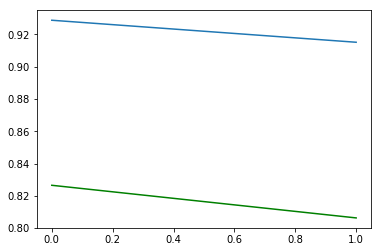

In [34]:
%matplotlib inline
plt.plot(history.epoch, history.history['loss'] ,'g')
plt.plot(history.epoch, history.history['val_loss'])

Here, we check our model for test data.
The accuracy is about 77%, which is the best that could be got for this particular model.

In [35]:
model.evaluate(xtr,ytr)

9944/9944 [==============================] - 15s 1ms/step


[0.91656490951800484, 0.74949718427964973]

In [33]:
model.save("Capstone.h5")

# Conclusion-

Using Neural Networks, I could train my model so as to get an accuracy of upto 74.9%.
We have used a Keras Sequestial model with the Adam optimizer to classify the results for this dataset.
This means that, given all the ingredients for a recipe, we will be able to predict the cuisine it belongs to with an accuracy of 74.9%. 